In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 
- However, there are some additional questions along the way that don't fit neatly into the one main example we'll walk through. Any question that isn't explicitly part of the main example is marked with **(detour)** at the start of the question.

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Answer: 
1. What is the psychopathology propesnsity ratio with occurence of left handed people?
2. How does being left-handed increase the percentage probability of being bipolar?
3. What is the probability decrease of having schizophrenia if you are left handed?

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [31]:
df = pd.read_csv('data.csv', delim_whitespace=1)
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,479.994503,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,3142.178542,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,186.000000,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,242.000000,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,324.250000,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,119834.000000,2.000000,2.000000,23763.000000,4.000000,3.000000,5.000000,7.000000,7.000000,3.000000


In [32]:
#There looks to be some odd values for age above 99.
df[df['age'] > 99]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
2075,3,4,5,4,3,4,5,4,3,3,...,US,2,1,123,1,1,5,7,7,3
2137,1,2,5,4,3,1,5,1,5,3,...,US,2,1,409,2,1,5,6,1,1
2690,2,5,5,1,5,5,5,5,4,2,...,US,2,2,23763,4,1,2,7,7,0


In [33]:
#Will assume first to numbers are true age
df.iloc[2075, df.columns.get_loc('age')] = 12
df.iloc[2137, df.columns.get_loc('age')] = 40
df.iloc[2690, df.columns.get_loc('age')] = 23

In [34]:
df['age'].describe().T

count    4184.000000
mean       24.581979
std        10.870193
min        12.000000
25%        18.000000
50%        21.000000
75%        27.000000
max        86.000000
Name: age, dtype: float64

### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer:
1. Obsficating the religion so that instead of it's actual name it could be a replaced variable. Since relgion can be used for political agendas.
2. Gender could also something that might need to be either eliminated (if it's found to be a non-variable in dataset) or replaced with 1 and 0s to hide which gender is being talked about.
3. Orientation would be another factor that needs to be carefully considered. It can be a very sensitive and private choice for some, so even implying a personality connection with left-handness would have to be considered carefully. As well with other factors.

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [35]:
lefthand = df[df.hand ==2]
righthand = df[df.hand == 1]
topdif = lefthand.mean() - righthand.mean()
abs(topdif).sort_values(ascending=False).head(10)
# Got the average of each catergory for lefthanded and compared it to the Righthanded average. The largest differences should reflect the biggest difference between 
#handnesses. 


introelapse    330.381990
testelapse     149.124335
age              1.320833
hand             1.000000
Q8               0.217961
Q22              0.184292
Q43              0.179986
Q42              0.171075
Q4               0.161624
Q23              0.158254
dtype: float64

In [36]:
#Q8               0.217961 I know the birthdays of my friends. 
#Q22              0.184292 I save the letters I get
#Q43              0.179986 I think a natural disaster would be kind of exciting
#Q42              0.171075 I bake sweets just for myself sometimes.
#Q4               0.161624 I give people handmade gifts.
#Q23              0.158254 I playfully insult my friends.

In [37]:
features = ['Q8', 'Q22', 'Q43', 'Q42', 'Q4', 'Q23']
lefthand[features].mean(),
compared = pd.DataFrame()
compared['rh'] = righthand[features].mean()
compared['lf'] = lefthand[features].mean()
compared['dif'] = compared['rh'] - compared['lf']
compared.index = ['Fr Bday', 'Letters', 'Dist +', 'Self Bake', 'Crap gifts', 'Insult']

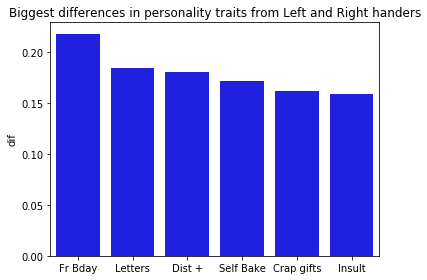

In [38]:
import seaborn as sns
plt.title('Biggest differences in personality traits from Left and Right handers');
sns.barplot(x=compared.index, y=compared['dif'], data=compared, color='b');
plt.tight_layout()

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer: Classification because lefthandness is a nominal catergorial variable.

### (detour) 6. While this isn't the problem we set out to solve, suppose I wanted to predict the exact age of the respondent using Q1 - Q44 as my predictors. Would this be a classification or regression problem? Why?

Answer: It could be regression depending on how to look at it. Since the Y target is age, we could evaluate X based on Questions on the X. Since the value of Righthandness wouldn't be too pertinent to the analysis and not dependent on it, we would not have a classification target.

### 7. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: Standarizing variables is necessary for KNN with Eucledian because standization makes all variables contribute equally. in general it's a good idea in order to get equal contribution weights and to make sure that one variable will not contribute more than others. 

### 8. Give an example of when we might not standardize our variables.

Answer: If the units on features is meaningful and the distance makes a difference. 

### 9. Based on your answers to 7 and 8, do you think we should standardize our predictor variables in this case? Why or why not?

Answer: Yes because I've read that KNN is dependent on using SS to make all variables contribute equally.

### 10. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: We need to set the target to be only left handed and the other target to be not left handed. Already did it.

### 11. The professor for whom you work suggests that you set $k = 4$. Why might this be a bad idea in this specific case?

Answer: Since the difference between left and right handed people is so minute, using a large knn might make it too broad and introduce too much bias

### 12. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [39]:
df['target'] = [1 if x == 2 else 0 for x in df['hand']]
y = df['target']
features = ['Q' + str(x) for x in range(1, 45) ]
X = df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
X_train =ss.transform(X_train)
X_test =ss.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
print('=== K-marts Nearest Neighbor 3 ====')
print('Model Accuracy: ', knn.score(X_train, y_train)) 
print('Test Accuracy: ', knn.score(X_test, y_test))
print('R2 Score: ', r2_score(y_test, knnpred))

=== K-marts Nearest Neighbor 3 ====
Model Accuracy:  0.9069471000637349
Test Accuracy:  0.858508604206501
R2 Score:  -0.5801894496162017


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
print('=== K-marts Nearest Neighbor 5 ====')
print('Model Accuracy: ', knn.score(X_train, y_train)) 
print('Test Accuracy: ', knn.score(X_test, y_test))
print('R2 Score: ', r2_score(y_test, knnpred))

=== K-marts Nearest Neighbor 5 ====
Model Accuracy:  0.8887826641172721
Test Accuracy:  0.8862332695984704
R2 Score:  -0.2705577331373512


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
print('=== K-marts Nearest Neighbor 15 ====')
print('Model Accuracy: ', knn.score(X_train, y_train)) 
print('Test Accuracy: ', knn.score(X_test, y_test))
print('R2 Score: ', r2_score(y_test, knnpred))

=== K-marts Nearest Neighbor 15 ====
Model Accuracy:  0.8891013384321224
Test Accuracy:  0.8996175908221797
R2 Score:  -0.12108035276825113


In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
print('=== K-marts Nearest Neighbor 25 ====')
print('Model Accuracy: ', knn.score(X_train, y_train)) 
print('Test Accuracy: ', knn.score(X_test, y_test))
print('R2 Score: ', r2_score(y_test, knnpred))

=== K-marts Nearest Neighbor 25 ====
Model Accuracy:  0.8891013384321224
Test Accuracy:  0.9005736137667304
R2 Score:  -0.11040339702760105


Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

In [44]:
# Yes it's default to "penalty" to L2 which is ridge. I know because it's the default?

In [45]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)
logitpred = logit.predict(X_test)
print('=== Logistic Regression ====')
print()
print('Model Accuracy: ', logit.score(X_train, y_train)) 
print('Test Accuracy: ', logit.score(X_test, y_test))
print('R2 Score: ', r2_score(y_test, logitpred))

=== Logistic Regression ====

Model Accuracy:  0.8891013384321224
Test Accuracy:  0.9005736137667304
R2 Score:  -0.11040339702760105


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
#Quick check on odds
a = pd.DataFrame(logit.predict_proba(X_test))
a[a[1]>.40]

,0,1
73,0.596764,0.403236


### 14. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features? Well, the answer is (as always), **it depends**. What is one reason you would standardize? What is one reason you would not standardize?

Answer:
- An example of when I would standardize in logistic regression is when we are dealing with different y values per feature
- An example of when I would not standardize in logistic regression is when we are dealing with same y values per feature

### 15. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

In [47]:
l1 = LogisticRegression(penalty='l1', C=.99)
l1.fit(X_train, y_train)
l1pred =l1.predict(X_test)
print('=== Lasso Alpha 1 ====')
print('Model Accuracy: ', l1.score(X_train, y_train)) 
print('Test Accuracy: ', l1.score(X_test, y_test))
print('R2 Score: ', r2_score(y_test, l1pred))

=== Lasso Alpha 1 ====
Model Accuracy:  0.8891013384321224
Test Accuracy:  0.9005736137667304
R2 Score:  -0.11040339702760105


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
l10 = LogisticRegression(penalty='l1', C= .10)
l10.fit(X_train, y_train)
l10pred =l10.predict(X_test)
print('=== Lasso Alpha 10 ====')
print('Model Accuracy: ', l10.score(X_train, y_train)) 
print('Test Accuracy: ', l10.score(X_test, y_test))
print('R2 Score: ', r2_score(y_test, l10pred))

=== Lasso Alpha 10 ====
Model Accuracy:  0.8891013384321224
Test Accuracy:  0.9005736137667304
R2 Score:  -0.11040339702760105


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
r1 = LogisticRegression(penalty='l2', C= .99)
r1.fit(X_train, y_train)
r1pred =r1.predict(X_test)
print('=== Ridge Alpha 1 ====')
print('Model Accuracy: ', r1.score(X_train, y_train)) 
print('Test Accuracy: ', r1.score(X_test, y_test))
print('R2 Score: ', r2_score(y_test, r1pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


=== Ridge Alpha 1 ====
Model Accuracy:  0.8891013384321224
Test Accuracy:  0.9005736137667304
R2 Score:  -0.11040339702760105


In [50]:
r10 = LogisticRegression(penalty='l2', C= .10)
r10.fit(X_train, y_train)
r10pred =r10.predict(X_test)
print('=== Ridge Alpha 10 ====')
print()
print('Model Accuracy: ', r10.score(X_train, y_train)) 
print('Test Accuracy: ', r10.score(X_test, y_test))
print('R2 Score: ', r2_score(y_test, r10pred))

=== Ridge Alpha 10 ====

Model Accuracy:  0.8891013384321224
Test Accuracy:  0.9005736137667304
R2 Score:  -0.11040339702760105


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


---
## Step 5: Evaluate the model(s).

### 16. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not?

Answer: No, I have several reasons to believe that the X variable is not indicative of predicting handness. The data doesn't seem to support it and also we went into the survey with the assumption.

### 17. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)

| k_neighbor | 3   | 5   | 15  | 25  |
|------------|-----|-----|-----|-----|
| TRAIN      | .90 | .90 | .89 | .89 |
| Test       | .84 | .87 | .89 | .89 |

### 18. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Answer: KNN 3 has some overfitting because the model is higher than the test

### 19. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer: Smaller values of KNN makes the model more fit to the training. However it makes it less bias. 

### 20. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: 1You may want to try increasing KNN. Low KNN overfits 2, 

### 21. In which of your logistic regression models is there evidence of overfitting? How do you know?

Answer: Yes in all of them they are overfit because the model is higher than the test data in all alpha cases.

### 22. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer: As C increases (meaning Alpha decreases), we create a more varied model. Since decreasing alpha means we create more variance

### 23. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What might this mean in the context of this problem?

In [51]:
las = LogisticRegression(penalty='l1', C= .00000000000000001)
las.fit(X_train, y_train)
laspred =las.predict(X_test)
print('=== Ridge Alpha 10 ====')
print()
print('Model Accuracy: ', las.score(X_train, y_train)) 
print('Test Accuracy: ', las.score(X_test, y_test))
print('R2 Score: ', r2_score(y_test, laspred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


=== Ridge Alpha 10 ====

Model Accuracy:  0.8891013384321224
Test Accuracy:  0.9005736137667304
R2 Score:  -0.11040339702760105


Answer: Altering the C doesn't change much. This likely might mean that because since the alpha isn't affecting the model, it could be that our model is not overly complex to begin with and that any efforts to reduce it's complexity will not make it any more bias. 

### 24. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: Lasso, ridge, and increasing or decaresing n_neighbors

---
## Step 6: Answer the problem.

### 25. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer: Because I want to find out which feature is most important, I would use logistic regresson model. I want to get the features of impact instead of a classification model. 

### 26. Select a logistic regression model. Interpret the coefficient for `Q1`.

In [52]:
logit.coef_[0][0]
# This coefficent means that as Q1 goes up, the probablility this person is left hand is likely going down by 5.4%. 

0.01174148280260706

### 27. If you have to select one model overall to be your *best* model, which model would you select? Why?

Answer: KNN with K_n=15. It looks like predicted and model are closest. 

### 28. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer these for the professor based on the model you selected!

### 1. What is the psychopathology propesnsity ratio with occurence of left handed people?
## High they really enjoy, insulting people 
### 2. How does being left-handed increase the percentage probability of being bipolar?
## Not determinable from data
### 3. What is the probability decrease of having schizophrenia if you are left handed?
## Not determinable from data.

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following:
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)
- Fit and evaluate one or more of the generalized linear models discussed above.
- Create a plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?